In [2]:
import pandas as pd
import numpy as np

from collections import Counter

In [3]:
FEATURES_PARQUET = '../../data/features/featureswithouttags.parquet'
samples = pd.read_parquet(FEATURES_PARQUET)

feature_groups = [
    "audio_features",
    "metadata",
    "ranks",
    "social_features",
    "temporal_features",
    "album",
    "artist",
    "set",
    "track",
]

all_features = {f"{_group}" : [] for _group in feature_groups}


for feat_comb in samples.columns:
    _group = feat_comb[0]
    #print(feat_comb)
    _feature = feat_comb[1]
    all_features[_group].append(_feature)

In [3]:
#samples

In [4]:
selected_samples = samples[['audio_features','metadata','track']]
selected_samples.columns = selected_samples.columns.droplevel(0)
selected_samples.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,None,None,...,None,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,None,3,None,[],Food
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,None,None,...,None,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,None,4,None,[],Electric Ave
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,None,None,...,None,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,None,6,None,[],This World
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,...,None,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,None,1,None,[],Freeway
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,None,None,...,None,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,None,5,None,[],Street Music


# Stats

In [5]:
genre_counter = Counter(selected_samples['genre_top'])
print(genre_counter)

Counter({'Rock': 3892, None: 3774, 'Electronic': 2170, 'Hip-Hop': 910, 'Folk': 874, 'Old-Time / Historic': 357, 'Pop': 346, 'Classical': 265, 'Jazz': 241, 'International': 133, 'Instrumental': 84, 'Blues': 66, 'Experimental': 17})


In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("white")

In [65]:
# plt.figure(figsize=(10,7), dpi=80)
# 
# sns.displot(
#     data=selected_samples,
#     x='tempo',
#     col='genre_top',
#     kde=True,
#     col_wrap=3
# )
# 
# plt.legend()

## Tempo Based Music Genre Selection for Physical Activities

In [7]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import LabelEncoder


In [8]:
y=selected_samples.genre_top
X=selected_samples.copy()

le = LabelEncoder()
y=le.fit_transform(y)

X,y = RandomOverSampler().fit_resample(X,y)
print(Counter(X.genre_top))

Counter({'Hip-Hop': 3892, 'Pop': 3892, 'Folk': 3892, 'Jazz': 3892, 'Rock': 3892, None: 3892, 'Electronic': 3892, 'International': 3892, 'Blues': 3892, 'Classical': 3892, 'Old-Time / Historic': 3892, 'Instrumental': 3892, 'Experimental': 3892})


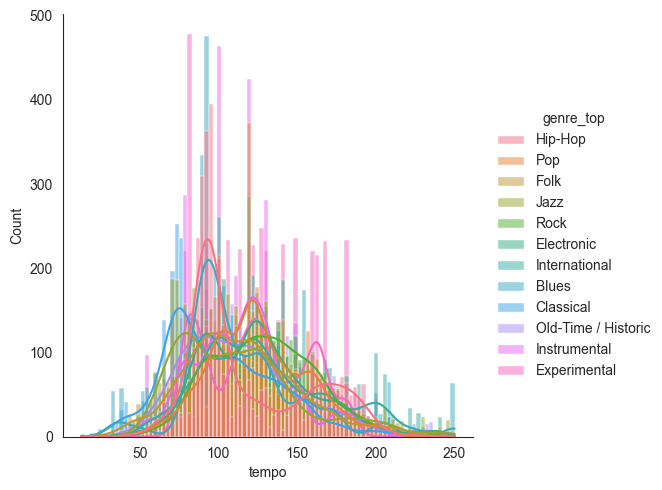

In [9]:
sns.displot(data=X, x='tempo', hue='genre_top', kde=True, fill=True)

In [10]:
selected_samples.groupby(by='genre_top')['tempo'].mean().sort_values(ascending=False)

genre_top
Rock                   128.571483
International          128.390421
Pop                    124.518483
Electronic             124.421170
Experimental           123.640412
Hip-Hop                118.632192
Instrumental           116.030714
Old-Time / Historic    114.746902
Blues                  114.674970
Folk                   114.394836
Jazz                   112.583178
Classical              101.176181
Name: tempo, dtype: float64

## Instrumentalness/Speechiness Music Genre Selection for Focused/Attention Based Activities

In [134]:
(X.groupby(by='genre_top')['instrumentalness'].mean()).sort_values(ascending=False)

genre_top
Old-Time / Historic    0.786503
Electronic             0.762705
Classical              0.756776
Jazz                   0.755440
Rock                   0.663444
Folk                   0.652471
Instrumental           0.646123
International          0.622366
Blues                  0.544086
Experimental           0.518068
Pop                    0.479759
Hip-Hop                0.356175
Name: instrumentalness, dtype: float64

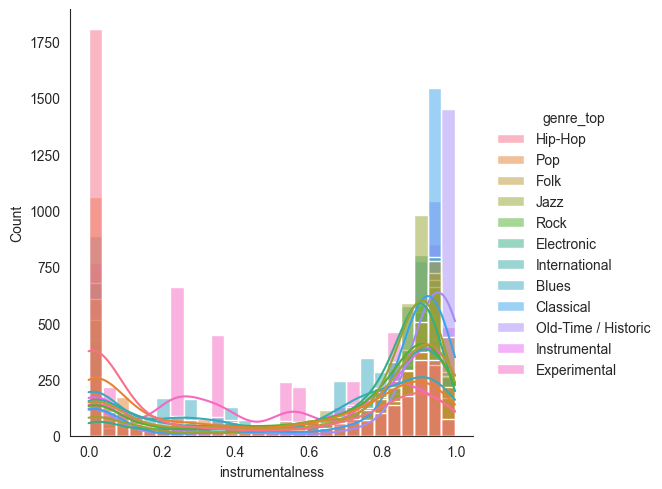

In [133]:
sns.displot(data=X, x='instrumentalness', hue='genre_top', kde=True, fill=True)

genre_top
Classical              0.052737
Folk                   0.062493
Pop                    0.063020
Rock                   0.069846
Blues                  0.085478
Experimental           0.091255
Instrumental           0.097122
Jazz                   0.097447
Electronic             0.111514
International          0.120761
Old-Time / Historic    0.144042
Hip-Hop                0.254705
Name: speechiness, dtype: float64

In [45]:
print(Counter(selected_samples[selected_samples.tempo>120].genre_top))

Counter({'Rock': 2310, None: 1891, 'Electronic': 1188, 'Folk': 354, 'Hip-Hop': 333, 'Pop': 192, 'Old-Time / Historic': 144, 'Jazz': 95, 'International': 74, 'Classical': 74, 'Instrumental': 39, 'Blues': 25, 'Experimental': 10})


In [7]:
#selected_samples.genre_top.value_counts()

In [8]:
selected_samples

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,None,None,...,None,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,None,3,None,[],Food
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,None,None,...,None,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,None,4,None,[],Electric Ave
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,None,None,...,None,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,None,6,None,[],This World
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,...,None,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,None,1,None,[],Freeway
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,None,None,...,None,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,None,5,None,[],Street Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,None,None,...,None,20996,None,Attribution-Noncommercial-Share Alike 3.0 Unit...,13365,None,8,None,[],I'm Wearing My Dancing Pants
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,None,None,...,None,4501,None,Attribution-Noncommercial-Share Alike 3.0 Unit...,3588,None,9,None,[],Me Funky You Jane
124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,None,None,...,None,3641,None,Attribution-Noncommercial-Share Alike 3.0 Unit...,2956,None,10,None,[],Ain't Mad at Ya


# Clustering Music based on Genres
---

## Relaxation and Meditation
---

### Genres
- Classical


### References
- Effect of Different Music Genre: Attention vs. Meditatio
    - Ramdinmawii,Mittal
- The effect of different genres of music and silence on relaxation and anxiety : A randomized controlled trial
    - Malakoutikhah, Gehghan, Ghonchehpoorca
- Coping with Stress: The Effectiveness of Different Types of Music
    - Labbe


## Focus and Attention
---
### Genres
- Old-Time / Historic
- Electronic 
- Jazz

### References
- Effects of Three Genres of Focus Music on Heart Rate Variability
and Sustained Attention
    - Kirk, Ngnoumen, Purvis
- Do you listen to music while studying? A portrait of how people use music to optimize their cognitive performance
    - GOltz, Sadakata
https://journals.sagepub.com/doi/10.1177/0305735611422672
https://link.springer.com/article/10.1007/s12144-008-9040-z
https://www.sciencedirect.com/science/article/pii/S0001691821001670#bb0485



## Physical Activity
---
### Genres
- Rock
- Internaltional
- Pop

### References
- Effect of different types of music on exercise performance in normal individuals
    - Thakur, Yardi

- THE EFFECTS OF MUSIC GENRE ON SPONTANEOUS EXERCISE AND ENJOYMENT
    - Victor Johnson

> Note: Allegro (fast, 120–168 BPM)
Italian for “lively” or “cheerful”, Allegro compositions embody a range of uplifting and playful emotions. They’re usually played in a bright and cheerful manner.



In [135]:
relax_genres = ['Classical']
focus_genres = ['Instrumental','Electronic', 'Old-Time / Historic']
physical_genres = ['Rock', 'International', 'Pop']

relax_mask = selected_samples.genre_top.isin(relax_genres)
focus_mask = selected_samples.genre_top.isin(focus_genres)
physical_mask = selected_samples.genre_top.isin(physical_genres)


selected_samples.cluster = 0
condlist = [relax_mask,focus_mask,physical_mask]
choicelist = [1,2,3]
selected_samples['cluster'] = np.select(condlist,choicelist,0)
selected_samples['cluster'].value_counts()

C:\Users\g.agluba\AppData\Local\Temp\ipykernel_21796\739420467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_samples['cluster'] = np.select(condlist,choicelist,0)


cluster
0    5882
3    4371
2    2611
1     265
Name: count, dtype: int64

In [137]:
clustered_tracks = selected_samples[selected_samples['cluster'] != 0] 
clustered_tracks['cluster'].value_counts()

cluster
3    4371
2    2611
1     265
Name: count, dtype: int64

In [138]:
selected_groups = ['audio_features','metadata','track']
old_cols = []
for _group in selected_groups:
    for _feat in all_features[_group]:
        print((_group,_feat))

('audio_features', 'acousticness')
('audio_features', 'danceability')
('audio_features', 'energy')
('audio_features', 'instrumentalness')
('audio_features', 'liveness')
('audio_features', 'speechiness')
('audio_features', 'tempo')
('audio_features', 'valence')
('metadata', 'album_date')
('metadata', 'album_name')
('metadata', 'artist_latitude')
('metadata', 'artist_location')
('metadata', 'artist_longitude')
('metadata', 'artist_name')
('metadata', 'release')
('track', 'bit_rate')
('track', 'comments')
('track', 'composer')
('track', 'date_created')
('track', 'date_recorded')
('track', 'duration')
('track', 'favorites')
('track', 'genre_top')
('track', 'genres')
('track', 'genres_all')
('track', 'information')
('track', 'interest')
('track', 'language_code')
('track', 'license')
('track', 'listens')
('track', 'lyricist')
('track', 'number')
('track', 'publisher')
('track', 'tags')
('track', 'title')


In [139]:
clustered_tracks

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,...,interest,language_code,license,listens,lyricist,number,publisher,tags,title,cluster
track_id,,,,,,,,,,,,,,,,,,,,,
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,...,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,None,1,None,[],Freeway,3
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,None,None,...,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,None,2,None,[],Hundred-Year Flood,3
154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,None,None,...,242,en,Attribution-NonCommercial-NoDerivatives (aka M...,205,None,4,None,[],Squares And Circles,3
155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,None,None,...,268,en,Attribution-NonCommercial-NoDerivatives (aka M...,197,None,0,None,[],Maps of the Stars Homes,3
169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,None,None,...,815,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,270,None,1,None,[],Boss of Goth,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124184,0.022261,0.638672,0.955109,0.802745,0.352897,0.072761,124.996,0.143388,None,None,...,3366,None,Attribution-NonCommercial-ShareAlike,2722,None,1,None,[],Heist,3
124185,0.032193,0.670471,0.968672,0.781511,0.212983,0.052916,95.066,0.319052,None,None,...,3553,None,Attribution-NonCommercial-ShareAlike,2741,None,2,None,[],Wrecking Ball Surprise,3
124186,0.005324,0.269402,0.864542,0.343687,0.262544,0.100601,83.747,0.597184,None,None,...,4026,None,Attribution-NonCommercial-ShareAlike,3138,None,3,None,[],Bloodgod,3


In [140]:
## Save clustered tracks

CLUSTERED_FEATURES_PARQUET = '../../data/features/featureswithouttags-clustered.parquet'
clustered_tracks.to_parquet(CLUSTERED_FEATURES_PARQUET, index=True )

# Scatter Plots Feature

In [141]:
#clustered_tracks[all_features['audio_features']+['cluster']]

In [142]:
# g = sns.PairGrid(clustered_tracks,hue="cluster")
# g.map(sns.scatterplot)